In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/Shareddrives/segmentation/train_dataset(update)/train_dataset/

/content/drive/Shareddrives/segmentation/train_dataset(update)/train_dataset


In [ ]:
ls

convert.py                        Dockerfile        train2014/     val2014.zip
convert.sh                        download.sh       train2014.zip  val_mask/
densepose_coco_2014_minival.json  environment.yaml  train_mask/
densepose_coco_2014_train.json    requirements.txt  val2014/


In [ ]:
!bash download.sh

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: val2014/COCO_val2014_000000535608.jpg  
 extracting: val2014/COCO_val2014_000000279145.jpg  
 extracting: val2014/COCO_val2014_000000243495.jpg  
 extracting: val2014/COCO_val2014_000000225791.jpg  
 extracting: val2014/COCO_val2014_000000428067.jpg  
 extracting: val2014/COCO_val2014_000000059383.jpg  
 extracting: val2014/COCO_val2014_000000558498.jpg  
 extracting: val2014/COCO_val2014_000000376123.jpg  
 extracting: val2014/COCO_val2014_000000191304.jpg  
 extracting: val2014/COCO_val2014_000000171062.jpg  
 extracting: val2014/COCO_val2014_000000014549.jpg  
 extracting: val2014/COCO_val2014_000000121152.jpg  
 extracting: val2014/COCO_val2014_000000276596.jpg  
 extracting: val2014/COCO_val2014_000000029431.jpg  
 extracting: val2014/COCO_val2014_000000036349.jpg  
 extracting: val2014/COCO_val2014_000000502055.jpg  
 extracting: val2014/COCO_val2014_000000438848.jpg  
 extracting: val2014/COCO_val2014_000000364973.jpg  
 extractin

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 10.3 MB 14.0 MB/s 
     |████████████████████████████████| 15.7 MB 50.5 MB/s 
     |████████████████████████████████| 49.9 MB 32 kB/s 
     |████████████████████████████████| 3.0 MB 77.4 MB/s 
     |████████████████████████████████| 76 kB 5.2 MB/s 
  Attempting uninstall: six
    Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.3
    Uninstalling tqdm-4

In [ ]:
!bash convert.sh

Extract Train data Segmentation Mask
loading annotations into memory...
Done (t=19.40s)
creating index...
index created!
  0% 0/26437 [02:00<?, ?it/s]
Traceback (most recent call last):
  File "convert.py", line 102, in <module>
    make_mask(coco, im_ids, img_folder_name)
  File "convert.py", line 69, in make_mask
    result_mask = np.zeros(cur_image.shape[:2])
AttributeError: 'NoneType' object has no attribute 'shape'
Extract Val data Segmentation Mask
loading annotations into memory...
Done (t=1.59s)
creating index...
index created!
100% 1508/1508 [19:11<00:00,  1.31it/s]


In [ ]:
ls

convert.py                        Dockerfile        train2014/     val2014.zip
convert.sh                        download.sh       train2014.zip  val_mask/
densepose_coco_2014_minival.json  environment.yaml  train_mask/
densepose_coco_2014_train.json    requirements.txt  val2014/


In [ ]:
from sklearn.model_selection import train_test_split
from glob import glob

train_image = glob('./train2014/*.jpg')
train_mask = glob('./train_mask/*.png')

In [ ]:
valid_image = glob('./val2014/*.jpg')
valid_mask = glob('./val_mask/*.png')

print(len(train_image), len(train_mask), len(valid_image), len(valid_mask))

82783 26437 40504 3016


#Img load test

In [ ]:
ls

balloon_dataset.zip               Dockerfile        train2014.zip
convert.py                        download.sh       train_mask/
convert.sh                        environment.yaml  val2014/
densepose_coco_2014_minival.json  requirements.txt  val2014.zip
densepose_coco_2014_train.json    train2014/        val_mask/


In [ ]:
jsonTrain = glob('./val2014/densepose_coco_2014_minival.json')
print(jsonTrain)

['./val2014/densepose_coco_2014_minival.json']


In [ ]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
dataDir='./val2014'
dataType='densepose_coco_2014_minival'
annFile='{}/{}.json'.format(dataDir,dataType)
print(annFile)

./val2014/densepose_coco_2014_minival.json


In [ ]:
coco=COCO(annFile)

loading annotations into memory...
Done (t=0.74s)
creating index...
index created!


In [ ]:
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person

COCO supercategories: 
person


In [ ]:
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [458755])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

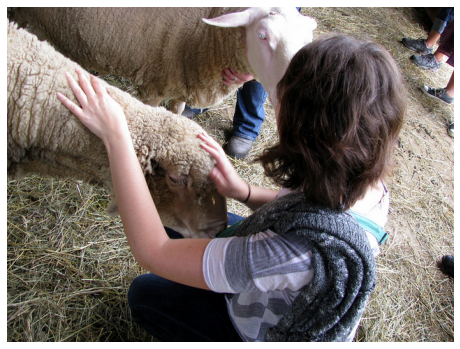

In [ ]:
I = io.imread('%s/%s'%(dataDir,img['file_name']))
plt.axis('off')
plt.imshow(I)
plt.show()

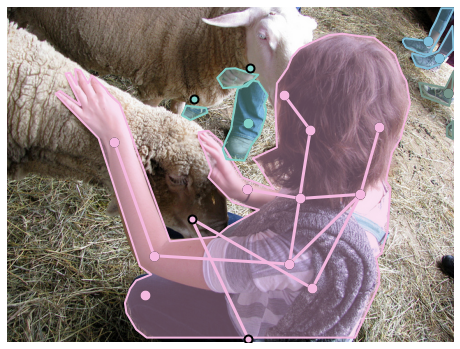

In [ ]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

#Model test

In [ ]:
cd /content/drive/Shareddrives/segmentation/train_dataset(update)/train_dataset

/content/drive/Shareddrives/segmentation/train_dataset(update)/train_dataset


In [ ]:
!unzip balloon_dataset.zip

Archive:  balloon_dataset.zip
   creating: balloon/
   creating: balloon/train/
  inflating: balloon/train/via_region_data.json  
   creating: __MACOSX/
   creating: __MACOSX/balloon/
   creating: __MACOSX/balloon/train/
  inflating: __MACOSX/balloon/train/._via_region_data.json  
  inflating: balloon/train/53500107_d24b11b3c2_b.jpg  
  inflating: __MACOSX/balloon/train/._53500107_d24b11b3c2_b.jpg  
  inflating: balloon/train/120853323_d4788431b9_b.jpg  
  inflating: __MACOSX/balloon/train/._120853323_d4788431b9_b.jpg  
  inflating: balloon/train/126700562_8e27720147_b.jpg  
  inflating: __MACOSX/balloon/train/._126700562_8e27720147_b.jpg  
  inflating: balloon/train/145053828_e0e748717c_b.jpg  
  inflating: __MACOSX/balloon/train/._145053828_e0e748717c_b.jpg  
  inflating: balloon/train/154446334_5d41cd1375_b.jpg  
  inflating: __MACOSX/balloon/train/._154446334_5d41cd1375_b.jpg  
  inflating: balloon/train/155815494_800fc9aa32_b.jpg  
  inflating: __MACOSX/balloon/train/._155815494_8

In [ ]:
!pip install pyyaml==5.1
!pip install torch==1.9.0+cu102 torchvision==0.10.0+cu102 -f https://download.pytorch.org/whl/torch_stable.html
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.9/index.html

     |████████████████████████████████| 274 kB 13.1 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=fc2b079067de4062111983d2bdb3be530c0a66987638815c26dbf094381c7e99
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 831.4 MB 2.7 kB/s 
     |████████████████████████████████| 22.1 MB 1.2 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu111
    Uninstalling torch-1.9.0+cu111:
      Successfully uninstalled torch-1.9.0+cu111
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu111
    Uninstalling torchvision-0.10.0+cu111:
      Succes

In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.9.0+cu102 True


In [ ]:
from detectron2.structures import BoxMode
from detectron2.data import MetadataCatalog, DatasetCatalog
import os
import json

def get_balloon_dicts(img_dir):
    json_file = os.path.join(img_dir, 'via_region_data.json')
    with open(json_file) as f:
        imgs_anns = json.load(f)
    
    dataset_dixts = []
    for idx, v in enumerate(imgs_anns.values()):
        record = {}

        filename = os.path.join(img_dir, v['filename'])
        height, width = cv2.imread(filename).shape[:2]

        record['filename'] = filename
        record['image_id'] = idx
        record['height'] = height
        record['width'] = width

        annos = v['regions']
        objs = []

        for _, anno in annos.items():
            anno = anno['shape_attributes']
            px = anno['all_points_x']
            py = anno['all_points_y']
            poly = [(x + 0.5, y + 0.5) for x, y in zip(px, py)]
            poly = [p for x in poly for p in x]

            obj = {
                'bbox' : [np.min(px), np.min(py), np.max(px), np.max(py)],
                'bbox_mode' : BoxMode.XYXY_ABS,
                'segmentation' : [poly],
                'category_id' : 0,
            }
            objs.append(obj)
        
        record['annotations'] = objs
        dataset_dicts.append(record)
    return dataset_dicts

for d in ['train', 'val']:
    DatasetCatalog.register('balloon_' + d, lambda d=d: get_balloon_dicts('balloon/' + d))
    MetadataCatalog.get('balloon_' + d).set(thing_classes=['balloon'])

balloon_metadata = MetadataCatalog.get('balloon_train')

In [ ]:
import cv2, random
import numpy as np

dataset_dicts = get_balloon_dicts('balloon/train')

for d in random.sample(dataset_dixts, 3):
    img = cv2.imread(d['file_name'])
    visualizer = visualizer(img[:, :, ::-1], metadata=balloon_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])